In [1]:
# Load modules for data manipulation
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os

In [2]:
# Load modules for machine learning
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Calculate the accurancy of the model
from sklearn.metrics import accuracy_score, classification_report

In [8]:
load_dotenv()

True

In [11]:
eco = pd.read_csv(os.getenv('CLEANED_DATA_PATH') + '/' + 'eco-products.csv', encoding='ISO-8859-1', sep='\t')
clt = pd.read_csv(os.getenv('CLEANED_DATA_PATH') + '/' + 'TJ38.csv', encoding='ISO-8859-1', sep='\t')
ctr = pd.read_csv(os.getenv('CLEANED_DATA_PATH') + '/' + 'TJ7S.csv', encoding='ISO-8859-1', sep='\t', low_memory=False)

## Get the best ecological product

In [12]:
eco = [str(i).zfill(5) for i in eco['COPRO']]

In [9]:
## ECO: 00003 | 242568 - LIVRET DEVELOPPEMENT DURABLE ET SOLIDAIRE
## DEPOTS MONETAIRES - EPARGNE MONETAIRE LIQUIDE - LIVRETS REGLEMENTES
ctr[ctr['COPRO'].isin(eco)]['COPRO'].value_counts()

00003    242568
00546      5141
00548      4785
07649      2724
00940      2166
00509      1876
00547      1027
00941       388
03992       101
00565        83
06458        75
Name: COPRO, dtype: int64

## Concatinate with other tables TJ39 - TJDR - TJER

In [13]:
tj39 = pd.read_csv(os.getenv('DATA_PATH') + '/' + 'tj39.csv', encoding='ISO-8859-1', sep=';')
tjdr = pd.read_csv(os.getenv('DATA_PATH') + '/' + 'tjdr.csv', encoding='ISO-8859-1', sep=';')
tjer = pd.read_csv(os.getenv('DATA_PATH') + '/' + 'tjer.csv', encoding='ISO-8859-1', sep=';')

In [14]:
tj39 = tj39[['COMAX', 'MSMENC', 'MTPATR', 'MTVAOP']]
tjdr = tjdr[['COMAX', 'MTRVIM', 'MTRVFR', 'QTPAFI', 'COHAVI']]
tjer = tjer[['COMAX', 'MTAPJE', 'MTCPJE', 'MTPJE']]

In [15]:
tj39['COMAX'] = [val[:10] for val in tj39['COMAX'].values]

In [16]:
# pour le cas de la table tj39, la variable COMAX elle est de 13 caracteres
# or celle des autres tables sont de 10, donc il fallait convertir de 13 a 10
# on prend les 10 premiers caractères du COMAX de tj39, d'apres le data engineer
# de la PBS.
clt[clt['COMAX'] == '1ce15b6b35']

,COMAX,AGE,COSEXE,CTSCPI,CESITC,DDVALE,DFVALE,COPOST,LAT,LON
517291,1ce15b6b35,59,1,2300,1,2013-10-21,9999-01-01,66330,42.6813,2.9412


In [17]:
# This table is only good fot the moral clients only
data = pd.merge(clt,tj39,on='COMAX',how='left')
data = pd.merge(data,tjer,on='COMAX',how='left')
data = pd.merge(data,tjdr,on='COMAX',how='left')

In [18]:
data = data.dropna()

In [19]:
data = data.drop_duplicates(subset=['COMAX'])

In [20]:
data.shape

(2747, 20)

## les avec le 00003

In [21]:
ecos = ['00003']
ids = ctr[ctr['COPRO'].isin(ecos)]['COMAX'].values

In [22]:
data['ECO'] = data['COMAX'].isin(ids)

In [23]:
data.head()

,COMAX,AGE,COSEXE,CTSCPI,CESITC,DDVALE,DFVALE,COPOST,LAT,LON,...,MTPATR,MTVAOP,MTAPJE,MTCPJE,MTPJE,MTRVIM,MTRVFR,QTPAFI,COHAVI,ECO
167,07a5ef7d08,42,1,3400,0,2019-12-16,2020-02-20,11290,43.1802,2.1116,...,131000.0,131.0,0.0,0.0,2500.00,1.0,0.0,0.0,1.0,False
920,bf8d8de347,45,0,6300,0,2018-07-24,2018-08-09,66000,42.6976,2.8954,...,99000.0,99.0,0.0,0.0,0.00,0.0,29134.0,3.0,1.0,False
2529,76d59b11a9,60,0,1100,1,2018-11-27,9999-01-01,11220,43.0886,2.5195,...,400000.0,400.0,0.0,0.0,81832.88,0.0,0.0,0.0,1.0,True
2556,5115550eeb,27,1,1100,1,2020-03-13,9999-01-01,48100,44.5538,3.2914,...,0.0,0.0,0.0,0.0,6000.00,0.0,5954.0,1.0,1.0,True
2831,28ffeda2ef,44,1,4200,0,2016-10-25,2019-10-16,66220,42.8120,2.3750,...,0.0,0.0,0.0,0.0,0.00,0.0,23776.0,2.0,1.0,False


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 167 to 1871382
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   COMAX   2747 non-null   object 
 1   AGE     2747 non-null   int64  
 2   COSEXE  2747 non-null   int64  
 3   CTSCPI  2747 non-null   int64  
 4   CESITC  2747 non-null   int64  
 5   DDVALE  2747 non-null   object 
 6   DFVALE  2747 non-null   object 
 7   COPOST  2747 non-null   int64  
 8   LAT     2747 non-null   float64
 9   LON     2747 non-null   float64
 10  MSMENC  2747 non-null   float64
 11  MTPATR  2747 non-null   float64
 12  MTVAOP  2747 non-null   float64
 13  MTAPJE  2747 non-null   float64
 14  MTCPJE  2747 non-null   float64
 15  MTPJE   2747 non-null   float64
 16  MTRVIM  2747 non-null   float64
 17  MTRVFR  2747 non-null   float64
 18  QTPAFI  2747 non-null   float64
 19  COHAVI  2747 non-null   float64
 20  ECO     2747 non-null   bool   
dtypes: bool(1), float64(12), int64(5

In [25]:
data['CTSCPI'] = data['CTSCPI'].astype(str)
data['COPOST'] = data['COPOST'].astype(str)

In [32]:
cols = ['AGE', 'COSEXE', 'CTSCPI', 'LAT', 'LON', 'MSMENC', 'MTPATR',
        'MTVAOP', 'MTAPJE', 'MTCPJE', 'MTPJE', 'MTRVIM', 'MTRVFR', 'QTPAFI', 'COHAVI']

## Model

In [33]:
# Labels are the values we want to predict
labels = np.array(data['ECO'])

# Remove the labels from the features
features = np.array(data[cols])

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [34]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Classification report
print(classification_report(test_labels, predictions.round()))

              precision    recall  f1-score   support

       False       0.46      0.22      0.30       159
        True       0.74      0.90      0.81       391

    accuracy                           0.70       550
   macro avg       0.60      0.56      0.55       550
weighted avg       0.66      0.70      0.66       550



In [32]:
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
from sklearn import tree

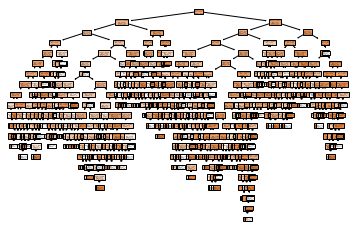

In [51]:
len(rf.estimators_)
_ = tree.plot_tree(rf.estimators_[0], feature_names=data.columns, filled=True)

### This time without deleting the nan values

In [61]:
# This table is only good fot the moral clients only
data = pd.merge(clt,tj39,on='COMAX',how='left')
data = pd.merge(data,tjer,on='COMAX',how='left')
data = pd.merge(data,tjdr,on='COMAX',how='left')

In [62]:
data = data.drop_duplicates(subset=['COMAX'])

In [64]:
data.fillna(data.mean(), inplace=True)

In [65]:
data.shape

(656954, 14)

In [67]:
data['MTPATR']

0          0.000000e+00
3          8.700000e+04
7          3.039181e+07
8          3.039181e+07
9          3.039181e+07
               ...     
2039737    3.039181e+07
2039738    3.039181e+07
2039739    3.039181e+07
2039740    3.039181e+07
2039741    1.300000e+05
Name: MTPATR, Length: 656954, dtype: float64

In [68]:
data['ECO'] = data['COMAX'].isin(ids)

In [69]:
data.head(2)

,COMAX,AGE,COSEXE,CTSCPI,MSMENC,MTPATR,MTVAOP,MTAPJE,MTCPJE,MTPJE,MTRVIM,MTRVFR,QTPAFI,COHAVI,ECO
0,6e3a2b9fa1,55,1,4600,0.0,0.0,0.0,787.452407,0.0,24581.208182,246.968502,9004.050139,0.923987,1.162566,False
3,1b44a67f61,41,0,4700,0.0,87000.0,87.0,787.452407,0.0,24581.208182,246.968502,9004.050139,0.923987,1.162566,False


In [70]:
# Labels are the values we want to predict
labels = np.array(data['ECO'])

# Remove the labels from the features
features = np.array(data[data.columns[1:-1]])

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [71]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Classification report
print(classification_report(test_labels, predictions.round()))

              precision    recall  f1-score   support

       False       0.75      0.90      0.82     93330
        True       0.52      0.27      0.36     38061

    accuracy                           0.72    131391
   macro avg       0.64      0.59      0.59    131391
weighted avg       0.69      0.72      0.69    131391



In [40]:
ctr[ctr['COCO'] == '5856256c8621c']

,COCO,COMAX,COPRO
0,5856256c8621c,a4375be9c2,00049


In [41]:
ctr[ctr['COMAX'] == 'a4375be9c2']

,COCO,COMAX,COPRO
0,5856256c8621c,a4375be9c2,00049
555588,10494e87143d4,a4375be9c2,00100
1666063,3c8770b4c1ae0,a4375be9c2,00753
2666770,8c28fa063b811,a4375be9c2,02076
2666771,aed405caa9e98,a4375be9c2,02076
...,...,...,...
31374818,804d456531628,a4375be9c2,00812
31374819,804d456531628,a4375be9c2,00812
31621037,bec61514eb210,a4375be9c2,00812
31671405,01fb906dac232,a4375be9c2,00812
